In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
# first load the processed data

df = pd.read_parquet("data/processed/thickener_timeseries.parquet")
print("filas, columnas:", df.shape)
print("columnas: \n",df.columns)
print("event_rate:", df["event_now"].mean())
print("target_event_30m rate:", df["target_event_30m"].mean())
nulos = df.isnull().mean() * 100
print("Columnas con nulos (%): \n", nulos[nulos > 0].sort_values(ascending=False))

filas, columnas: (25920, 25)
columnas: 
 Index(['timestamp', 'Qf_pulp_m3h', 'Qf_dilution_m3h', 'Qf_total_m3h', 'Qf_m3h',
       'Solids_f_pct', 'FeedDilution_On', 'FeedDilution_factor',
       'PSD_fines_idx', 'Floc_gpt', 'UF_capacity_factor', 'Qu_m3h',
       'Solids_u_pct', 'BedLevel_m', 'RakeTorque_pct',
       'Overflow_Turb_NTU_clean', 'Overflow_Turb_NTU', 'ControlMode',
       'OperatorAction', 'spec_limit_NTU', 'event_limit_NTU', 'event_now',
       'event_type', 'Regime', 'target_event_30m'],
      dtype='str')
event_rate: 0.04876543209876543
target_event_30m rate: 0.04876543209876543
Columnas con nulos (%): 
 Qf_m3h               0.999228
Solids_u_pct         0.999228
Overflow_Turb_NTU    0.999228
dtype: float64


In [50]:
# revision de calidad de los datos
print(df.describe(include='all'))
print(df.info())
print(df.head(8))   

                  timestamp   Qf_pulp_m3h  Qf_dilution_m3h  Qf_total_m3h  \
count                 25920  25920.000000     25920.000000  25920.000000   
unique                  NaN           NaN              NaN           NaN   
top                     NaN           NaN              NaN           NaN   
freq                    NaN           NaN              NaN           NaN   
mean    2026-02-14 23:57:30    577.955195         1.461652    579.416847   
min     2026-01-01 00:00:00    319.283751         0.000000    319.283751   
25%     2026-01-23 11:58:45    500.298341         0.000000    500.420862   
50%     2026-02-14 23:57:30    568.532202         0.000000    569.611010   
75%     2026-03-09 11:56:15    643.987204         0.000000    646.696809   
max     2026-03-31 23:55:00    900.000000       217.060376    912.730876   
std                     NaN    105.382779        14.762278    106.671672   

              Qf_m3h  Solids_f_pct  FeedDilution_On  FeedDilution_factor  \
count   256

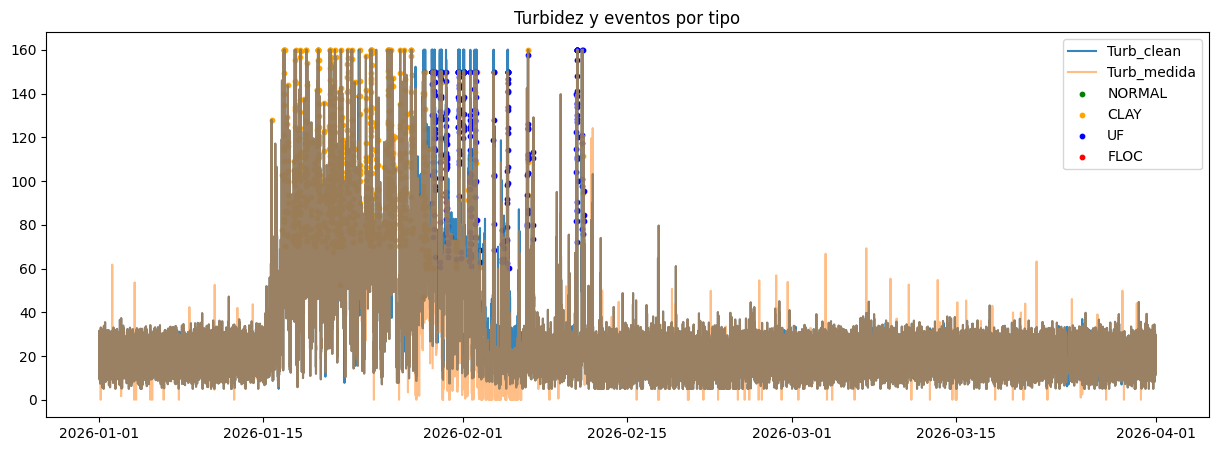

In [47]:
plt.figure(figsize=(15,5))

t = df["timestamp"]

plt.plot(t, df["Overflow_Turb_NTU_clean"], label="Turb_clean", alpha=0.9)
plt.plot(t, df["Overflow_Turb_NTU"], label="Turb_medida", alpha=0.5)

event_colors = {
    "NORMAL": "green",
    "CLAY": "orange",
    "UF": "blue",
    "FLOC": "red"
}

for ev, color in event_colors.items():
    mask = (df["event_now"] == 1) & (df["event_type"] == ev)
    plt.scatter(
        t[mask],
        df.loc[mask, "Overflow_Turb_NTU"],
        s=10,
        color=color,
        label=ev
    )

plt.legend()
plt.title("Turbidez y eventos por tipo")
plt.show()



c:\Users\Matias\TWS\Thickener-Water-Recovery-Sentinel-TWS\.venv_tws\Lib\site-packages\numpy\lib\_histograms_impl.py:897: RuntimeWarning: invalid value encountered in divide
  return n / db / n.sum(), bin_edges


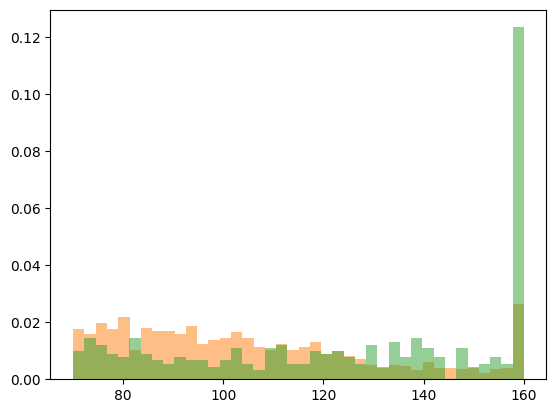

In [48]:
for r in ["NORMAL", "CLAY", "UF", "FLOC"]:
    data = df.loc[
        (df["Regime"] == r) &
        (df["event_now"] == 1) &
        (df["Overflow_Turb_NTU_clean"].notna()),
        "Overflow_Turb_NTU_clean"
    ]
    plt.hist(data, bins=40, alpha=0.5, density=True, label=r)


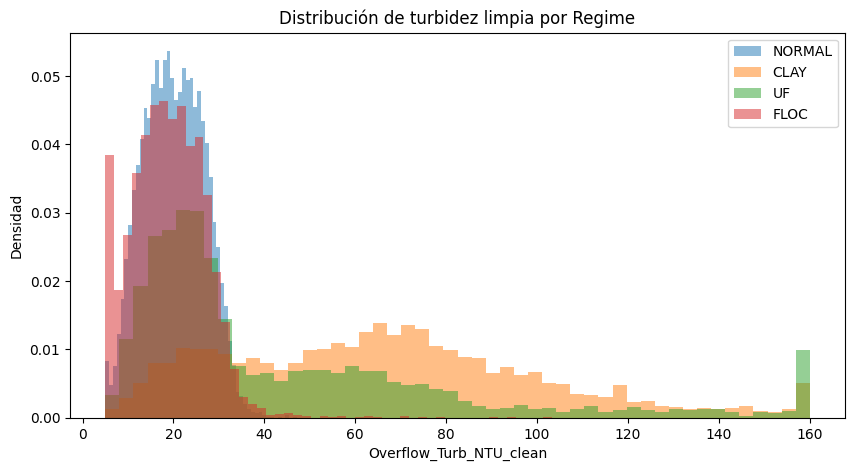

In [46]:
#Histograma por Regime de turbidez limpia (para comparar distribuciones
plt.figure(figsize=(10,5))

for r in ["NORMAL", "CLAY", "UF", "FLOC"]:
    data = df.loc[
        (df["Regime"] == r) & 
        (df["Overflow_Turb_NTU_clean"].notna()),
        "Overflow_Turb_NTU_clean"
    ]
    if len(data) > 0:
        plt.hist(data, bins=50, alpha=0.5, label=r, density=True)

plt.legend()
plt.title("Distribución de turbidez limpia por Regime")
plt.xlabel("Overflow_Turb_NTU_clean")
plt.ylabel("Densidad")
plt.show()


In [45]:
df["Regime"].value_counts()


Regime
NORMAL    13824
CLAY       4032
UF         4032
FLOC       4032
Name: count, dtype: int64